# Breast Cancer Classification

**Topik** : Klasifikasi pada Cancer Dataset menggunakan Ensemble Learning (Stacking)

**Kelompok 4 - IF-46-09**

**Anggota :**

- Muhammad Faris Dzulfiqar - 1301223258
- Sherly Angelina - 1301223370
- Nuh Priyonggo - 1301223390

**Tentang Dataset**

🦠 Breast Cancer Dataset
Dataset ini berisi karakteristik pasien yang didiagnosis menderita kanker. Dataset mencakup ID unik untuk setiap pasien, jenis kanker (diagnosis), karakteristik visual dari kanker, dan nilai rata-rata dari karakteristik tersebut.

📚 **Fitur utama dari dataset ini:**
- **`id`**: ID unik untuk setiap pasien  
- **`diagnosis`**: Jenis kanker, dengan nilai:  
  - `"M"` (**Malignant**) → Kanker ganas  
  - `"B"` (**Benign**) → Kanker jinak  
- **Karakteristik visual (rata-rata):**
`radius_mean`, `texture_mean`, `perimeter_mean`, `area_mean`, `smoothness_mean`, `compactness_mean`, `concavity_mean`, `concave points_mean`

Terdapat juga beberapa fitur numerik lainnya, di mana pasien diberi label dengan nilai-nilai numerik.

## Import Library & Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("/content/Cancer_Data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## EDA

### Overview

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### Drop kolom yang tidak relevan

In [7]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

### Cek data duplikat

In [8]:
df.duplicated().sum()

np.int64(0)

### Cek missing values

In [9]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


### Encode label target (diagnosis)

In [10]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

### Distribusi Target (diagnosis)



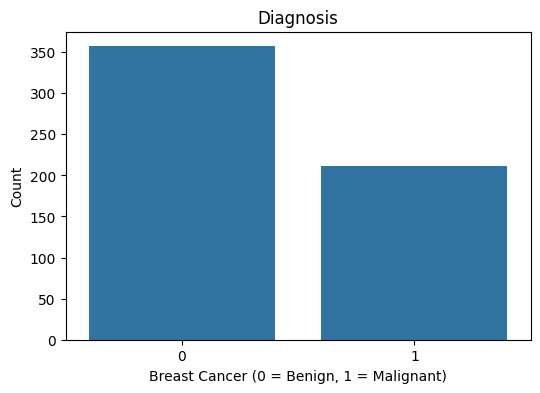

,count
diagnosis,
0,357
1,212


In [11]:
counts = df['diagnosis'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks([0, 1], ['0', '1'])
plt.title('Diagnosis')
plt.xlabel('Breast Cancer (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

counts

### Pisah fitur dan target

In [12]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

## Preprocessing


### Handle outlier

In [13]:
def handle_outliers(X):
    for col in X.columns:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        X.loc[X[col] > upper_bound, col] = Q3
        X.loc[X[col] < lower_bound, col] = Q1

    return X

In [14]:
X = handle_outliers(X)

#### Boxplot setelah handle outlier

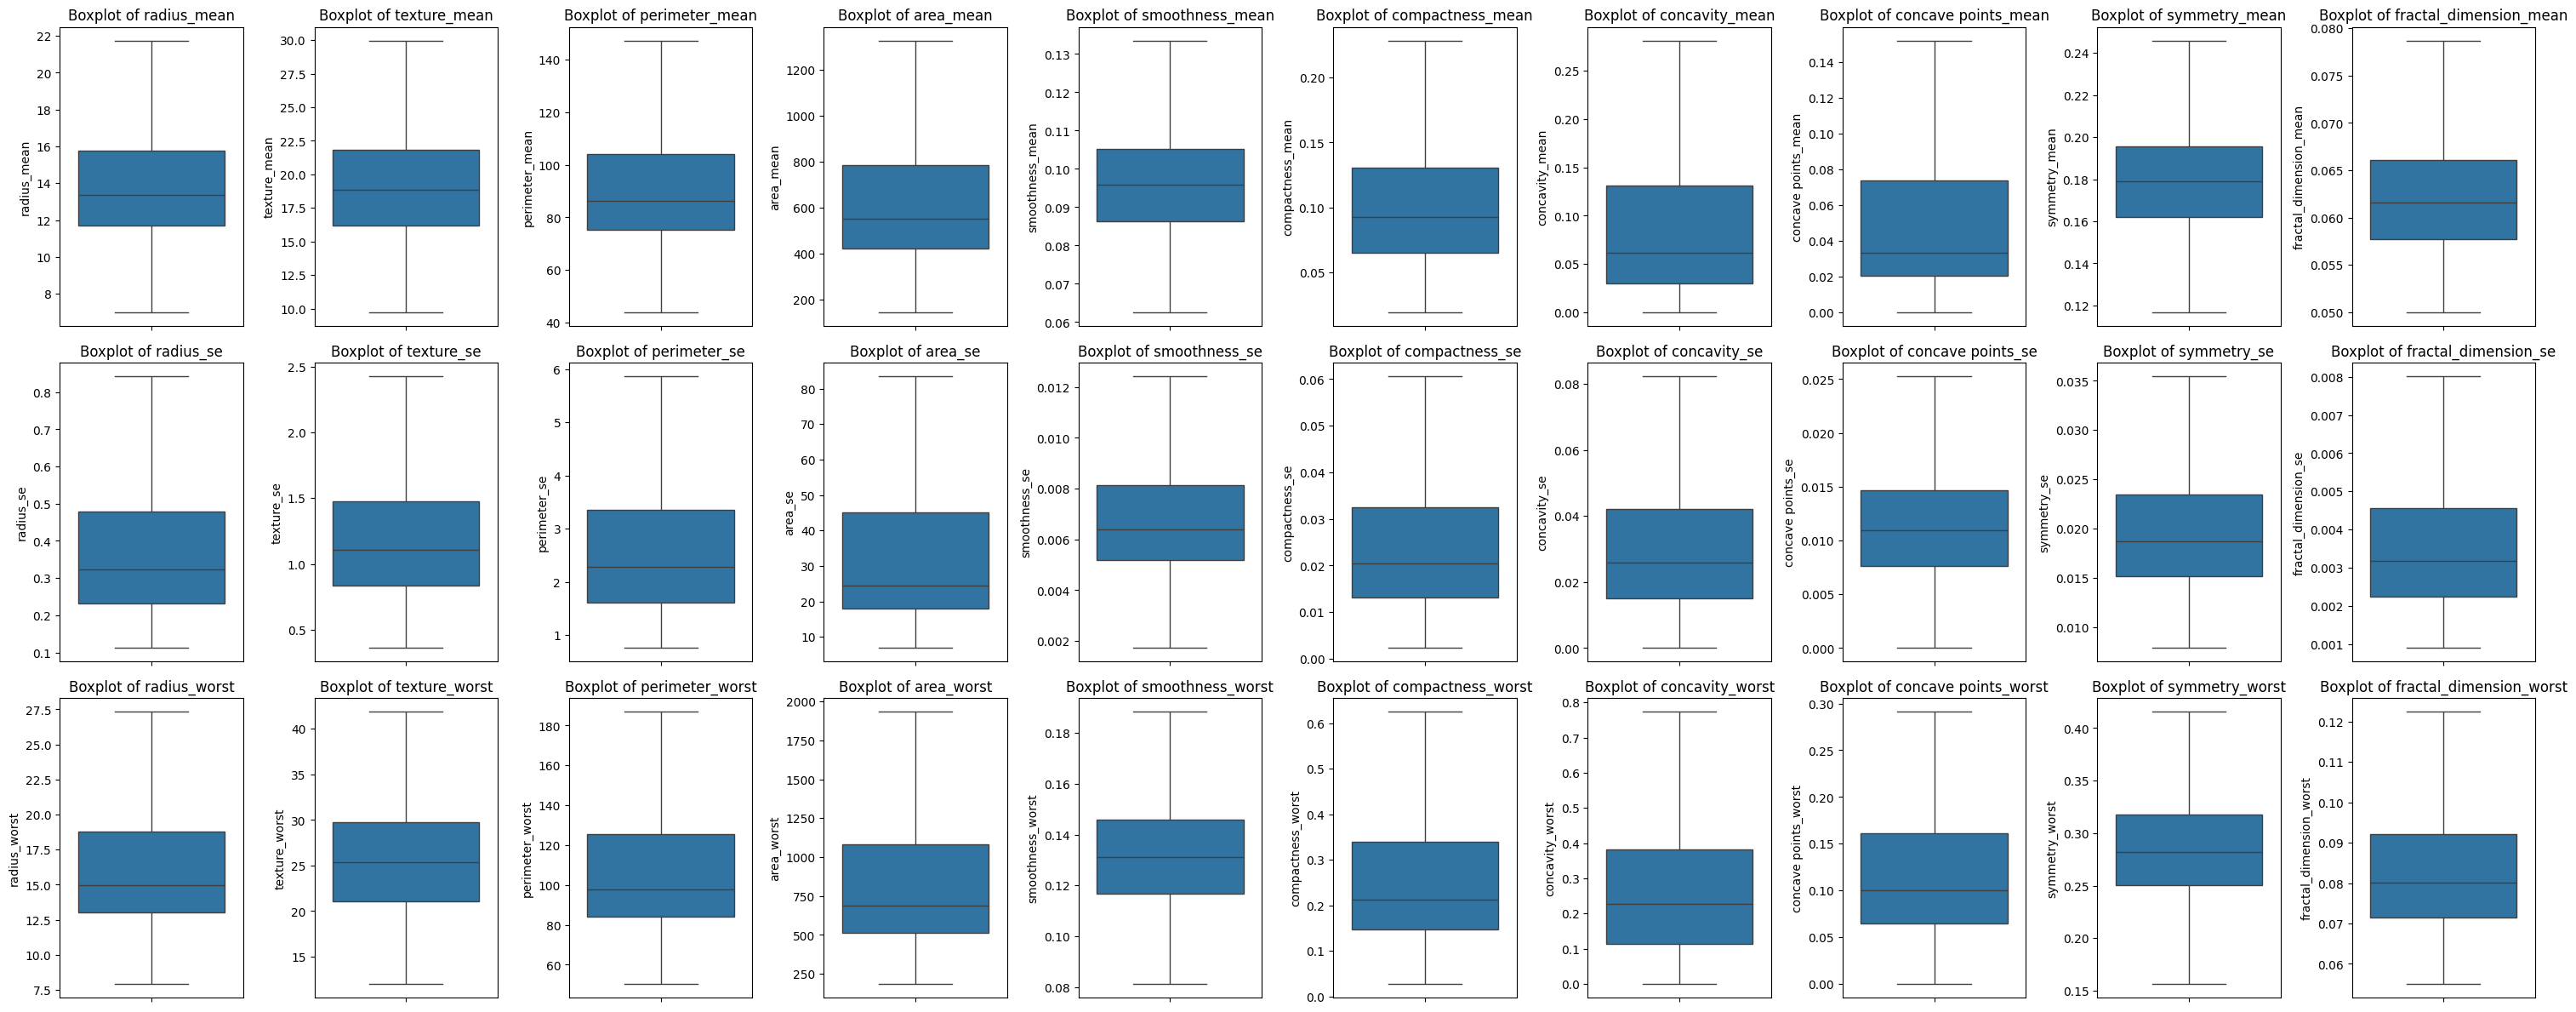

In [15]:
num_plots = len(X.columns)
cols = 10
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 4 * rows))

for idx, column in enumerate(X.columns):
    row_idx = idx // cols
    col_idx = idx % cols
    ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]

    sns.boxplot(y=X[column], ax=ax)
    ax.set_title(f"Boxplot of {column}", fontsize=12)
    ax.set_ylabel(column, fontsize=10)

for idx in range(num_plots, rows * cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.show()


### Normalisasi fitur menggunakan Z-Score

In [16]:
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

z_scores = (X - mean) / std_dev

X = z_scores

### Simpan mean dan std_dev

In [17]:
np.save('mean.npy', mean)
np.save('std.npy', std_dev)

## Modeling

### Acak dataset

In [18]:
df = pd.concat([X, y], axis=1)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.463708,-0.137336,-0.440544,-0.496945,0.272539,0.119243,-0.031906,-0.254980,0.542043,0.248492,...,-0.153024,-0.308627,-0.304843,0.503636,-0.031022,0.037359,-0.199563,0.379610,0.395770,0
1,1.616385,0.538321,1.538622,1.906901,-0.454500,0.054488,0.395299,0.924678,-0.896518,-1.305099,...,0.178830,2.080655,2.725086,-0.585120,-0.063689,0.046102,0.978975,-0.603570,-1.169997,1
2,0.497571,0.082065,0.519009,0.493376,0.998816,0.487678,0.985285,0.963524,0.567207,-0.734427,...,0.079616,0.678213,0.914422,1.064369,-0.018578,0.649338,0.560244,0.003751,-0.133881,1
3,-0.486213,-0.366711,-0.422853,-0.549243,0.709826,0.695341,-0.072257,-0.546896,0.063921,1.490344,...,-0.448955,-0.528913,-0.718235,0.615783,0.164199,-0.109079,-0.622863,-0.592952,0.837024,0
4,-0.762702,-1.174508,-0.740376,-0.789962,0.286988,0.257685,-0.225715,-0.605451,0.093279,0.945224,...,-1.001474,-0.899363,-0.866149,0.125142,-0.233243,-0.440203,-0.691687,-1.074986,-0.050557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1.615315,-1.124644,-1.478781,-1.379333,0.134127,1.175422,0.059955,-0.526045,0.445580,0.655629,...,-1.687419,-1.454183,-1.308359,-0.519701,0.014089,-0.638550,-1.016318,-1.234248,1.910093,0
565,-0.730552,-0.204653,-0.716166,-0.754355,1.379067,0.027693,-0.174817,-0.350953,0.021980,0.498907,...,0.637267,-0.669158,-0.703189,1.727902,0.188310,0.147734,0.109537,-0.062078,0.647191,0
566,0.121418,-0.581126,-0.011748,0.062011,-2.416591,-1.645891,-1.144626,-1.167859,-1.206879,-1.449897,...,-0.835548,-0.363699,-0.287757,-2.156573,-1.488878,-1.210859,-1.237560,-0.801055,-1.509814,0
567,0.021754,0.116970,0.026429,-0.060759,0.755456,0.286714,0.465608,0.499658,-0.531635,0.539791,...,0.900697,0.301948,0.183271,1.377444,0.894527,0.801240,1.036837,0.729987,1.699971,1


### Split dataset menjadi training dan testing

In [19]:
# (80% untuk train, 20% untuk test)
split_index = int(0.8 * len(df))

train_df = df[:split_index]
test_df = df[split_index:]

X_train = train_df.drop(columns=['diagnosis'])
y_train = train_df['diagnosis']
X_test = test_df.drop(columns=['diagnosis'])
y_test = test_df['diagnosis']

In [20]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.463708,-0.137336,-0.440544,-0.496945,0.272539,0.119243,-0.031906,-0.254980,0.542043,0.248492,...,-0.229285,-0.153024,-0.308627,-0.304843,0.503636,-0.031022,0.037359,-0.199563,0.379610,0.395770
1,1.616385,0.538321,1.538622,1.906901,-0.454500,0.054488,0.395299,0.924678,-0.896518,-1.305099,...,2.145568,0.178830,2.080655,2.725086,-0.585120,-0.063689,0.046102,0.978975,-0.603570,-1.169997
2,0.497571,0.082065,0.519009,0.493376,0.998816,0.487678,0.985285,0.963524,0.567207,-0.734427,...,0.800859,0.079616,0.678213,0.914422,1.064369,-0.018578,0.649338,0.560244,0.003751,-0.133881
3,-0.486213,-0.366711,-0.422853,-0.549243,0.709826,0.695341,-0.072257,-0.546896,0.063921,1.490344,...,-0.731149,-0.448955,-0.528913,-0.718235,0.615783,0.164199,-0.109079,-0.622863,-0.592952,0.837024
4,-0.762702,-1.174508,-0.740376,-0.789962,0.286988,0.257685,-0.225715,-0.605451,0.093279,0.945224,...,-0.880028,-1.001474,-0.899363,-0.866149,0.125142,-0.233243,-0.440203,-0.691687,-1.074986,-0.050557


In [21]:
y_train.head()

,diagnosis
0,0
1,1
2,1
3,0
4,0


In [22]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
455,1.458851,0.687913,1.380326,1.702903,-0.134329,-0.075245,0.506877,0.609341,-0.435172,-0.851968,...,1.583671,1.001622,1.386275,2.021222,0.685874,-0.111133,0.744413,0.354685,0.581342,-0.430225
456,1.510291,0.274042,1.468786,1.773375,-0.126724,0.137107,1.021968,0.861839,-0.414202,-0.899666,...,1.293118,0.295150,1.191301,1.544329,0.092432,-0.234021,0.460827,0.523700,-1.049504,-0.567166
457,-0.778777,-1.137110,-0.771104,-0.782544,0.648986,-0.405943,-0.444132,-0.783970,-0.070289,0.590896,...,-0.846410,-0.621724,-0.787852,-0.841157,0.157851,-0.317242,-0.003622,-0.613574,0.224594,0.707329
458,1.008754,-0.017663,1.063734,1.035271,1.371462,1.266972,1.663922,1.767006,1.406019,0.166724,...,0.880100,-0.110259,0.972384,0.998580,1.797994,1.179191,1.319783,2.127061,0.581342,0.621107
459,2.056838,1.971911,1.971609,2.492934,0.299156,0.186231,1.066294,1.319421,0.076503,-1.116011,...,2.018301,2.330747,1.957514,2.668981,0.952222,0.409975,0.647699,0.838891,0.670529,-0.148372


In [23]:
y_test.head()

,diagnosis
455,1
456,1
457,0
458,1
459,1


In [24]:
print(f"Data Training: {len(X_train)}")
print(f"Data Testing: {len(X_test)}")

Data Training: 455
Data Testing: 114


### Oversampling

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#### Distribusi Target (diagnosis) setelah oversampling

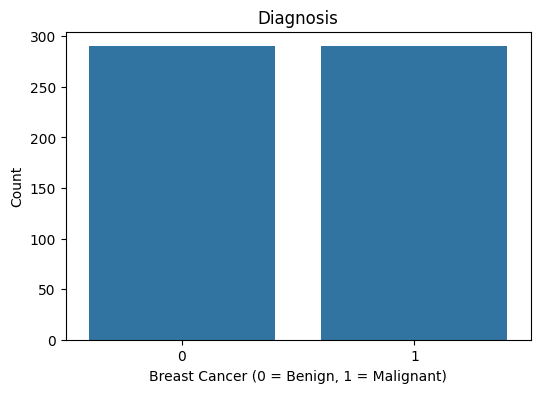

,count
diagnosis,
0,290
1,290


In [26]:
counts = y_train_resampled.value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks([0, 1], ['0', '1'])
plt.title('Diagnosis')
plt.xlabel('Breast Cancer (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

counts

### Base model

#### 1. KNN


K = 1
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



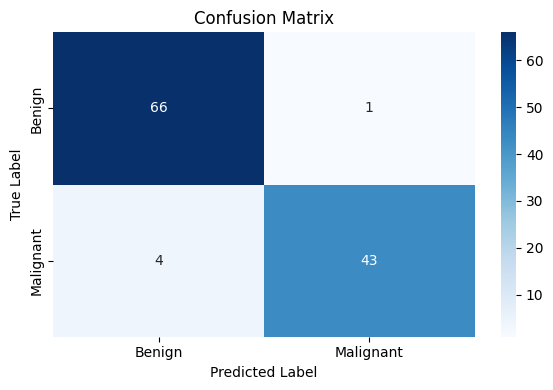


K = 3
Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.96      0.91      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



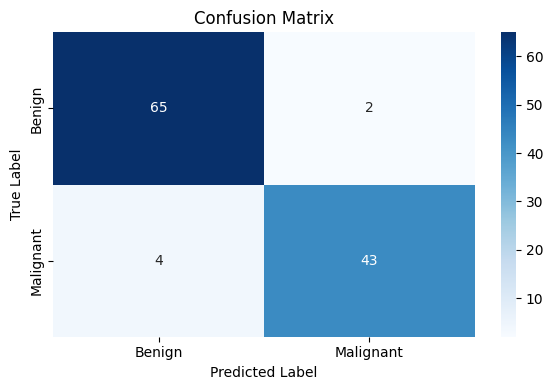


K = 5
Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



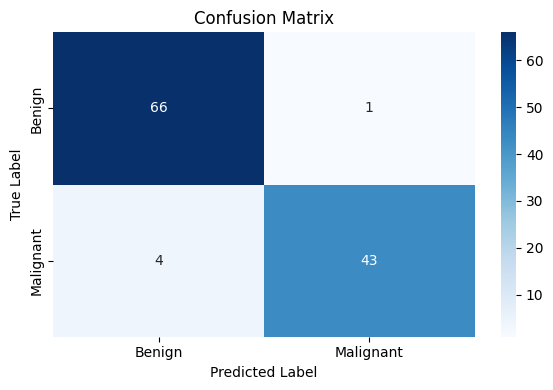

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

for k in [1, 3, 5]:
  knn_model = KNeighborsClassifier(n_neighbors=k)

  knn_model.fit(X_train_resampled, y_train_resampled)

  y_pred = knn_model.predict(X_test)

  print("\nK =", k)
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("\nClassification Report:\n", classification_report(y_test, y_pred))

  # Buat confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  labels = ['Benign', 'Malignant']

  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion Matrix')
  plt.tight_layout()
  plt.show()

#### 2. Logistic Regression

Accuracy: 0.9385964912280702

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.98      0.87      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



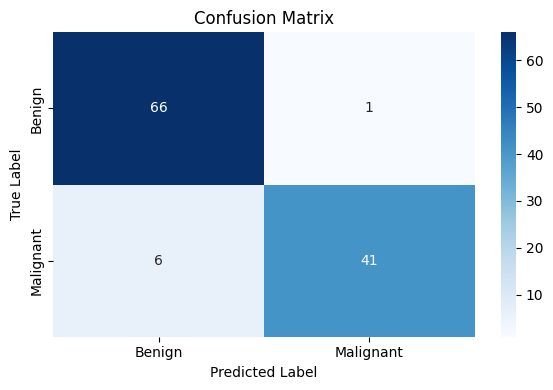

In [28]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_resampled, y_train_resampled)

y_pred = logreg_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['Benign', 'Malignant']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#### 3. Decision Tree

Accuracy: 0.9385964912280702

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        67
           1       0.98      0.87      0.92        47

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



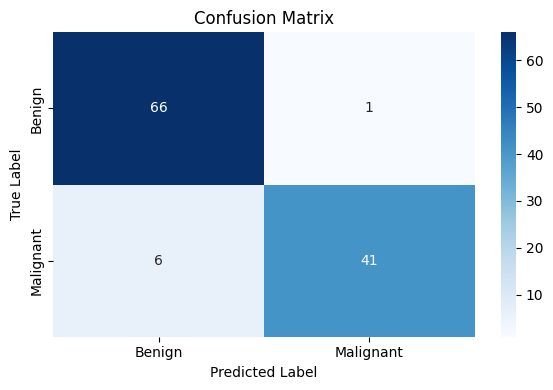

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['Benign', 'Malignant']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Stacking

In [30]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

# Base models
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=1)),
    ('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Meta model
meta_model = LogisticRegression()

# Stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train_resampled, y_train_resampled)

StackingClassifier(cv=5,
                   estimators=[('knn', KNeighborsClassifier(n_neighbors=1)),
                               ('lr', LogisticRegression(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Skor yang ingin dievaluasi di setiap fold
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Cross-validation
cv_results = cross_validate(
    stacking_model,
    X_train_resampled,
    y_train_resampled,
    cv=5,
    scoring=scoring
)

# Cetak skor per fold
for i in range(5):
    print(f"Fold {i+1}: "
          f"Accuracy = {cv_results['test_accuracy'][i]:.4f}, "
          f"Precision = {cv_results['test_precision'][i]:.4f}, "
          f"Recall = {cv_results['test_recall'][i]:.4f}, "
          f"F1-Score = {cv_results['test_f1'][i]:.4f}")

# Cetak rata-rata dari semua metrik
print("\nRata-rata:")
print(f"Accuracy  : {cv_results['test_accuracy'].mean():.4f}")
print(f"Precision : {cv_results['test_precision'].mean():.4f}")
print(f"Recall    : {cv_results['test_recall'].mean():.4f}")
print(f"F1-Score  : {cv_results['test_f1'].mean():.4f}")

Fold 1: Accuracy = 0.9655, Precision = 0.9500, Recall = 0.9828, F1-Score = 0.9661
Fold 2: Accuracy = 0.9828, Precision = 1.0000, Recall = 0.9655, F1-Score = 0.9825
Fold 3: Accuracy = 0.9741, Precision = 0.9508, Recall = 1.0000, F1-Score = 0.9748
Fold 4: Accuracy = 0.9828, Precision = 0.9667, Recall = 1.0000, F1-Score = 0.9831
Fold 5: Accuracy = 1.0000, Precision = 1.0000, Recall = 1.0000, F1-Score = 1.0000

Rata-rata:
Accuracy  : 0.9810
Precision : 0.9735
Recall    : 0.9897
F1-Score  : 0.9813


Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



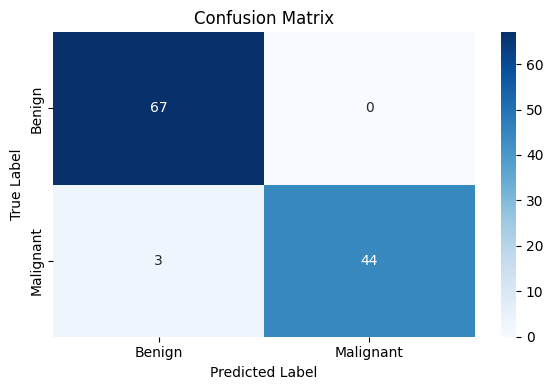

In [32]:
y_pred = stacking_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

labels = ['Benign', 'Malignant']

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Simpan model

In [33]:
import joblib
joblib.dump(stacking_model, 'stacking_model.pkl')

['stacking_model.pkl']